In [1]:
# !git clone https://github.com/riccardocadei/pneumoniadiagnosis

# import os
# os.chdir('/content/pneumoniadiagnosis')

# # replace all the 3 instances of './data/images/' in src.data.dataloaders.py by the path on Gdrive, for me it was
# # '/content/drive/MyDrive/visual_intelligence/images/'

In [1]:
from src.data.dataloaders import ENV_DataLoader
from src.models.train import train
from src.models.evaluate import test
from src.models.CheXNet import DenseNet121
from src.models.baseline import Baseline
from src.models.unet import UNet


from torch import optim
import torch

%load_ext autoreload
%autoreload 2

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


# Load Dataset

In [2]:
train_loaders = [ENV_DataLoader(batch_size=4,
                                shuffle=True, 
                                num_workers=0, 
                                pin_memory=True, 
                                stage = "train", 
                                type = i+1)
                for i in range(2)]

val_loaders = [ENV_DataLoader(batch_size=4,
                                shuffle=True, 
                                num_workers=0, 
                                pin_memory=True, 
                                stage = "train", 
                                type = i+1)
                for i in range(2)]

test_loader = ENV_DataLoader(batch_size=4,
                            shuffle=True, 
                            num_workers=0, 
                            pin_memory=True, 
                            stage = "test")

# Baseline CNN

In [3]:
model = Baseline()
optimizer = optim.Adam(model.parameters(), lr=0.002)
criterion = torch.nn.BCELoss()

## ERM

In [4]:
n_epochs = 20
irm = 0

#train(model, train_loaders, val_loaders, optimizer, criterion, irm, n_epochs, device)

name_model = f'{model.name}_irm_{irm}_ep_{n_epochs}'
test(model, test_loader, name_model, device)

  0%|          | 0/130 [00:00<?, ?it/s]

Accuracy of the model: 62.88461538461539 %


## IRM

  5%|▌         | 486/9720 [18:58<5:54:23,  2.30s/it]

0 0.6869421390763898


  5%|▌         | 487/9720 [26:18<342:37:43, 133.59s/it]

val er:  2615.8694871664047


 10%|█         | 972/9720 [44:50<5:34:53,  2.30s/it]

1 35.04344720231575


 15%|█▌        | 1458/9720 [1:10:41<5:17:04,  2.30s/it]

2 49.79616047876353


 20%|██        | 1944/9720 [1:36:27<4:53:37,  2.27s/it]

3 49.821867413753715


 25%|██▌       | 2430/9720 [2:02:13<4:37:51,  2.29s/it]

4 49.796160473492584


 30%|███       | 2916/9720 [2:27:14<4:13:14,  2.23s/it]

5 49.82186741767628


 35%|███▌      | 3402/9720 [2:51:54<3:48:48,  2.17s/it]

6 49.77045353592821


 40%|████      | 3888/9720 [3:16:34<3:34:49,  2.21s/it]

7 49.82186741767628


 45%|████▌     | 4374/9720 [3:41:09<3:14:31,  2.18s/it]

8 49.821867414979515


 50%|█████     | 4860/9720 [4:05:45<2:53:10,  2.14s/it]

9 49.77045353200565


 55%|█████▌    | 5346/9720 [4:30:20<2:39:31,  2.19s/it]

10 49.77045353592821


 60%|██████    | 5832/9720 [4:54:56<2:19:08,  2.15s/it]

11 49.77045353200565


 65%|██████▌   | 6318/9720 [5:19:34<2:04:11,  2.19s/it]

12 49.79616047741515


 70%|███████   | 6804/9720 [5:44:10<1:44:57,  2.16s/it]

13 49.79616047545387


 75%|███████▌  | 7290/9720 [6:08:50<1:28:08,  2.18s/it]

14 49.821867413753715


 80%|████████  | 7776/9720 [6:33:30<1:10:57,  2.19s/it]

15 49.82186741963757


 85%|████████▌ | 8262/9720 [6:58:08<54:20,  2.24s/it]

16 49.79616047876353


 90%|█████████ | 8748/9720 [7:22:44<34:47,  2.15s/it]

17 49.82186741767628


 95%|█████████▌| 9234/9720 [7:47:21<17:42,  2.19s/it]

18 49.821867413753715


100%|██████████| 9720/9720 [8:11:54<00:00,  2.18s/it]

19 49.79616047680225


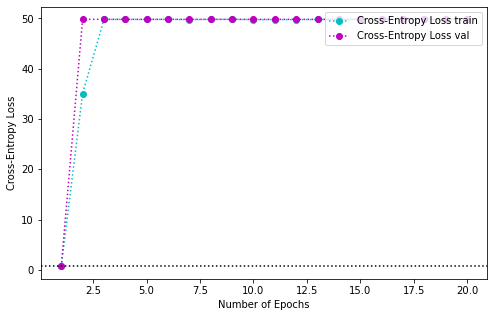

100%|██████████| 9720/9720 [8:18:53<00:00,  3.08s/it]


  0%|          | 0/130 [00:00<?, ?it/s]

Accuracy of the model: 64.23076923076923 %


In [4]:
n_epochs = 20
irm = 1

train(model, train_loaders, val_loaders, optimizer, criterion, irm, n_epochs, device)

name_model = f'{model.name}_irm_{irm}_ep_{n_epochs}'
test(model, test_loader, name_model, device)

# DenseNet121

In [5]:
model = DenseNet121(out_size=1)
optimizer = optim.Adam(model.parameters(), lr=0.002)
criterion = torch.nn.BCELoss()

## ERM

  5%|▌         | 486/9720 [22:26<7:03:51,  2.75s/it]

0 0.8065593475854183


  5%|▌         | 487/9720 [30:22<371:55:01, 145.01s/it]

val er:  2981.680630803108


 10%|█         | 972/9720 [52:40<6:41:17,  2.75s/it]

1 0.7093419525188162


 10%|█         | 973/9720 [1:00:34<350:22:05, 144.20s/it]

val er:  2708.1046001911163


 15%|█▌        | 1458/9720 [1:22:51<6:20:19,  2.76s/it]

2 0.6990404944186959


 20%|██        | 1944/9720 [1:53:02<5:58:36,  2.77s/it]

3 0.6857049624533763


 20%|██        | 1945/9720 [2:01:12<321:52:47, 149.04s/it]

val er:  2486.1152851581573


 25%|██▌       | 2430/9720 [2:23:25<5:18:29,  2.62s/it]

4 0.6779158862207114


 30%|███       | 2916/9720 [2:52:12<5:01:27,  2.66s/it]

5 0.6658637175829674


 30%|███       | 2917/9720 [2:59:44<259:38:42, 137.40s/it]

val er:  2480.732106566429


 35%|███▌      | 3402/9720 [3:21:00<4:38:33,  2.65s/it]

6 0.6616868528424927


 35%|███▌      | 3403/9720 [3:28:33<241:32:19, 137.65s/it]

val er:  2468.684961438179


 40%|████      | 3888/9720 [3:49:49<4:15:17,  2.63s/it]

7 0.6806022743332968


 45%|████▌     | 4374/9720 [4:18:37<3:54:32,  2.63s/it]

8 0.6557152840655996


 45%|████▌     | 4375/9720 [4:26:08<204:03:05, 137.43s/it]

val er:  2451.9217941761017


 50%|█████     | 4860/9720 [4:47:22<3:32:21,  2.62s/it]

9 0.6668646016586716


 55%|█████▌    | 5346/9720 [5:16:05<3:11:17,  2.62s/it]

10 0.6574902192179526


 55%|█████▌    | 5347/9720 [5:23:37<166:52:51, 137.38s/it]

val er:  2429.015926837921


 60%|██████    | 5832/9720 [5:44:49<2:48:56,  2.61s/it]

11 0.6500537341235536


 60%|██████    | 5833/9720 [5:52:21<148:18:22, 137.36s/it]

val er:  2418.3936670422554


 65%|██████▌   | 6318/9720 [6:13:34<2:28:24,  2.62s/it]

12 0.6536708862125721


 65%|██████▌   | 6319/9720 [6:21:04<129:19:56, 136.90s/it]

val er:  2372.117970228195


 70%|███████   | 6804/9720 [6:42:16<2:08:48,  2.65s/it]

13 0.6429698238336029


 75%|███████▌  | 7290/9720 [7:10:59<1:45:27,  2.60s/it]

14 0.6412173214179384


 80%|████████  | 7776/9720 [7:39:41<1:24:22,  2.60s/it]

15 0.6388790247372919


 85%|████████▌ | 8262/9720 [8:09:18<1:03:17,  2.60s/it]

16 0.632453171882041


 90%|█████████ | 8748/9720 [8:38:00<42:41,  2.63s/it]

17 0.6259279047308973


 90%|█████████ | 8749/9720 [8:45:32<37:00:44, 137.22s/it]

val er:  2321.464077949524


 95%|█████████▌| 9234/9720 [9:06:44<21:03,  2.60s/it]

18 0.6254580183323367


 95%|█████████▌| 9235/9720 [9:14:16<18:30:50, 137.42s/it]

val er:  2296.9057146310806


100%|██████████| 9720/9720 [9:35:27<00:00,  2.66s/it]

19 0.6204800915289048
val er:  2272.740953028202


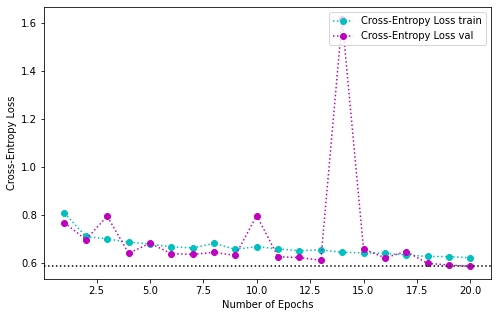

100%|██████████| 9720/9720 [9:43:00<00:00,  3.60s/it]


  0%|          | 0/130 [00:00<?, ?it/s]

Accuracy of the model: 78.65384615384616 %


In [6]:
n_epochs = 20
irm = 1

#train(model, train_loaders, val_loaders, optimizer, criterion, irm, n_epochs, device)

name_model = f'{model.name}_irm_{irm}_ep_{n_epochs}'
test(model, train_loaders[0], name_model, device)

## IRM

In [ ]:
n_epochs = 20
irm = 3

train(model, train_loaders, val_loaders, optimizer, criterion, irm, n_epochs, device)

name_model = f'{model.name}_irm_{irm}_ep_{n_epochs}'
test(model, test_loader, name_model, device)

In [ ]:
name_model = f'DenseNet121_irm_0_ep_20.pth'
test(model, test_loader, name_model, device)